# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
len(df_raw)

400

Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [6]:
df_raw.max()

admit         1
gre         800
gpa           4
prestige      4
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE is measured on a different scale.

#### Question 4. Drop data points with missing data


In [7]:
df = df_raw.dropna(how='any') 

In [8]:
len(df)

397

#### Question 5. Confirm that you dropped the correct data. How can you tell? 


Answer: Depending on the method, you may need to do more or less checking. In this case, using dropna() is good so just count() is a useful check.



I could also do a loc check per column, or against different indicators that it might be bad data.

#### Question 6. Create box plots for GRE and GPA

/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


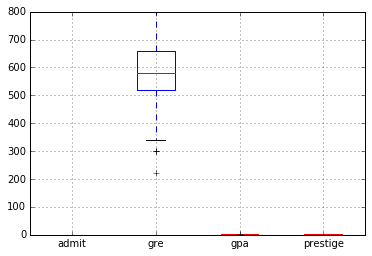

In [9]:
#boxplot 1
df.boxplot();


In [10]:
#boxplot 2 
# Creating a transformed value
df['gre_t'] = df['gre'].apply(lambda x: x/200.)


/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


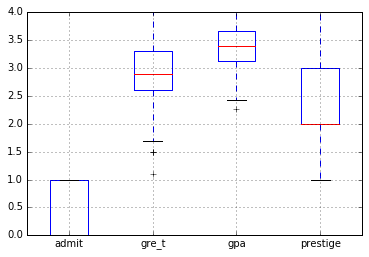

In [11]:
df.boxplot(column=['admit','gre_t','gpa','prestige']);

#### Question 7. What do this plots show?

Answer: Initially that the gre has at least 2 outliers. When transformed, both GPA and GRE_t have outliers on the lower side. What is interesitng is that the mean of prestige is also the min, giving it a strong positive skew to the right.

#### Question 8.  If our model had an assumption of a symmetric distribution would we meet that requirement? 

Answer: No, as prestige has a strong positive skew.

#### Question 9. Which of our variables are potentially colinear? 

In [12]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige,gre_t
admit,1.000000,0.181202,0.174116,-0.243563,0.181202
gre,0.181202,1.000000,0.382408,-0.124533,1.000000
gpa,0.174116,0.382408,1.000000,-0.060976,0.382408
prestige,-0.243563,-0.124533,-0.060976,1.000000,-0.124533
gre_t,0.181202,1.000000,0.382408,-0.124533,1.000000


#### Question 10. What did you find?

Answer: It looks like GRE and GPA are (unsurprisingly) correlated, and surprisingly prestige and admition _might_ have a negative correlation?

## Bonus/Advanced

In [77]:
#### 1. Bonus: Get rid of outliers in your dataset
iqr = df.quantile(.75)-df.quantile(.25)
mask = (df < df.quantile(.25)-iqr*1.5) | (df > df.quantile(.75)+iqr*1.5)
cleaned = df.drop(mask[mask.any(1) != False].any(1).keys())

In [119]:
len(cleaned)

392

#### 2. Bonus: Add dummy variables for GRE scores. Top 10% are considered very high. next 25% of GPA scores are considered high, medium 50% are considered medium and lowers 25% are considered Low. 

In [123]:
cleaned['gre_vhigh'] = cleaned.loc[cleaned['gre_t'] > cleaned['gre_t'].quantile(.9),'gre_t']
cleaned['gre_high'] = cleaned.loc[(cleaned['gre_t'] > cleaned['gre_t'].quantile(.65)) 
                                 & (cleaned['gre_t'] < cleaned['gre_t'].quantile(.90)),'gre_t']
cleaned['gre_med'] = cleaned.loc[(cleaned['gre_t'] > cleaned['gre_t'].quantile(.25)) 
                                 & (cleaned['gre_t'] < cleaned['gre_t'].quantile(.65)),'gre_t']
cleaned['gre_low'] = cleaned.loc[cleaned['gre_t'] < cleaned['gre_t'].quantile(.25),'gre_t']

,admit,gre,gpa,prestige,gre_t,gre_high,gre_vhigh,gre_med,gre_low
admit,1.000000,0.181976,0.172239,-0.237270,0.181976,-0.201705,-0.303697,0.083520,0.107121
gre,0.181976,1.000000,0.357025,-0.109055,1.000000,1.000000,1.000000,1.000000,1.000000
gpa,0.172239,0.357025,1.000000,-0.043483,0.357025,0.107052,0.224597,0.169246,0.100945
prestige,-0.237270,-0.109055,-0.043483,1.000000,-0.109055,-0.065527,-0.017319,-0.027841,0.090513
gre_t,0.181976,1.000000,0.357025,-0.109055,1.000000,1.000000,1.000000,1.000000,1.000000
gre_high,-0.201705,1.000000,0.107052,-0.065527,1.000000,1.000000,NaN,NaN,NaN
gre_vhigh,-0.303697,1.000000,0.224597,-0.017319,1.000000,NaN,1.000000,NaN,NaN
gre_med,0.083520,1.000000,0.169246,-0.027841,1.000000,NaN,NaN,1.000000,NaN
gre_low,0.107121,1.000000,0.100945,0.090513,1.000000,NaN,NaN,NaN,1.000000
